<a href="https://colab.research.google.com/github/JordiPG05/Aprender-Tutoriales/blob/main/Plot_Shoots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 KB 3.4 MB/s eta 0:00:00


In [14]:
pip install statsbombpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 KB 4.0 MB/s eta 0:00:00


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, Sbopen, VerticalPitch
from statsbombpy import sb

In [17]:
competitions_df = sb.competitions()
print('Available Competitions:', competitions_df['competition_name'].unique())


Available Competitions: ['Champions League' "FA Women's Super League" 'FIFA World Cup'
 'Indian Super league' 'La Liga' 'NWSL' 'Premier League' 'UEFA Euro'
 "UEFA Women's Euro" "Women's World Cup"]


In [27]:
matches_df_37_42 = sb.matches(competition_id = 37, season_id = 42)

In [35]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(2275154)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [34]:
shots = matches_df_37_42
shots

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,2275127,2019-10-13,15:00:00.000,England - FA Women's Super League,2019/2020,Reading WFC,Everton LFC,3,2,available,...,2021-06-13T16:17:31.694,4,Regular Season,Adams Park,Alan Dale,Kelly Chambers,Willie Kirk,1.1.0,2,2
1,2275136,2019-09-07,16:00:00.000,England - FA Women's Super League,2019/2020,Manchester City WFC,Manchester United,1,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Etihad Stadium,Rebecca Welch,Nick Cushing,Casey Stoney,1.1.0,2,2
2,2275154,2019-11-17,15:00:00.000,England - FA Women's Super League,2019/2020,Chelsea FCW,Manchester United,1,0,available,...,2021-06-13T16:17:31.694,6,Regular Season,Kingsmeadow,Jack Packman,Emma Hayes,Casey Stoney,1.1.0,2,2
3,2275150,2019-12-01,16:00:00.000,England - FA Women's Super League,2019/2020,West Ham United LFC,Manchester United,3,2,available,...,2021-06-13T16:17:31.694,8,Regular Season,The Rush Green Stadium,Amy Fearn,Matt Beard,Casey Stoney,1.1.0,2,2
4,2275146,2019-12-08,13:00:00.000,England - FA Women's Super League,2019/2020,Manchester United,Everton LFC,3,1,available,...,2021-06-13T16:17:31.694,9,Regular Season,Leigh Sports Village Stadium,Joe Hull,Casey Stoney,Willie Kirk,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2275120,2019-09-08,15:00:00.000,England - FA Women's Super League,2019/2020,Birmingham City WFC,Everton LFC,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,\tARMCO Arena,Elliot Swallow,Marta Tejedor,Willie Kirk,1.1.0,2,2
83,2275028,2019-10-12,15:00:00.000,England - FA Women's Super League,2019/2020,Manchester City WFC,Birmingham City WFC,3,0,available,...,2021-06-13T16:17:31.694,4,Regular Season,Academy Stadium,Helen Conley,Nick Cushing,Marta Tejedor,1.1.0,2,2
84,2275086,2019-12-08,15:30:00.000,England - FA Women's Super League,2019/2020,Reading WFC,Arsenal WFC,0,3,available,...,2021-06-13T16:17:31.694,9,Regular Season,Adams Park,Richard Hulme,Kelly Chambers,Joseph Montemurro,1.1.0,2,2
85,2275056,2019-11-17,16:00:00.000,England - FA Women's Super League,2019/2020,Liverpool WFC,Everton LFC,0,1,available,...,2021-06-13T16:17:31.694,6,Regular Season,Anfield,Amy Fearn,Victoria Jepson,Willie Kirk,1.1.0,2,2


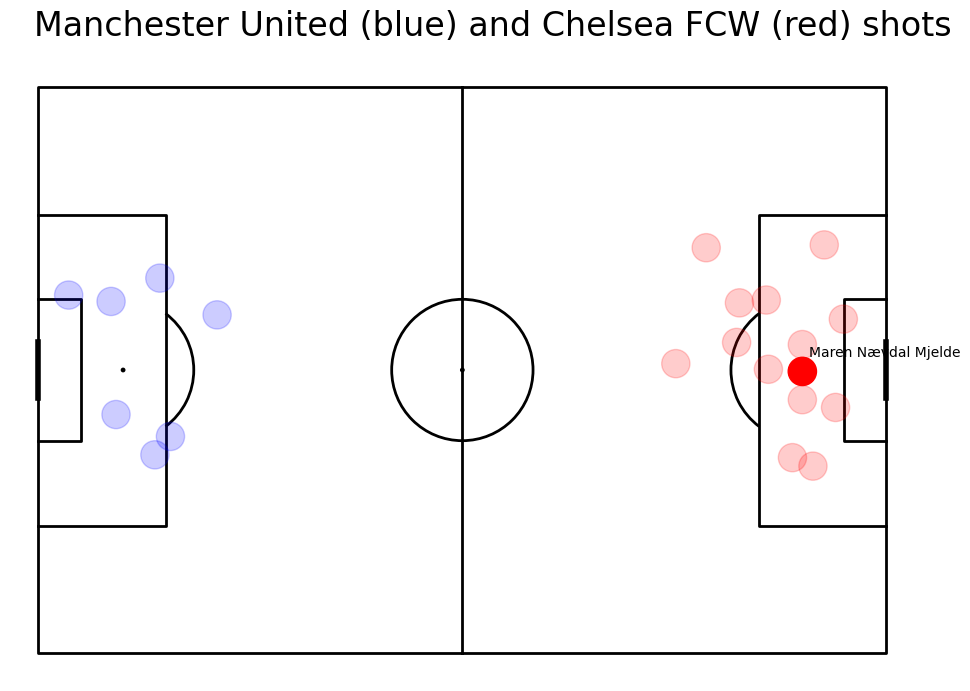

In [41]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("Manchester United (blue) and Chelsea FCW (red) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

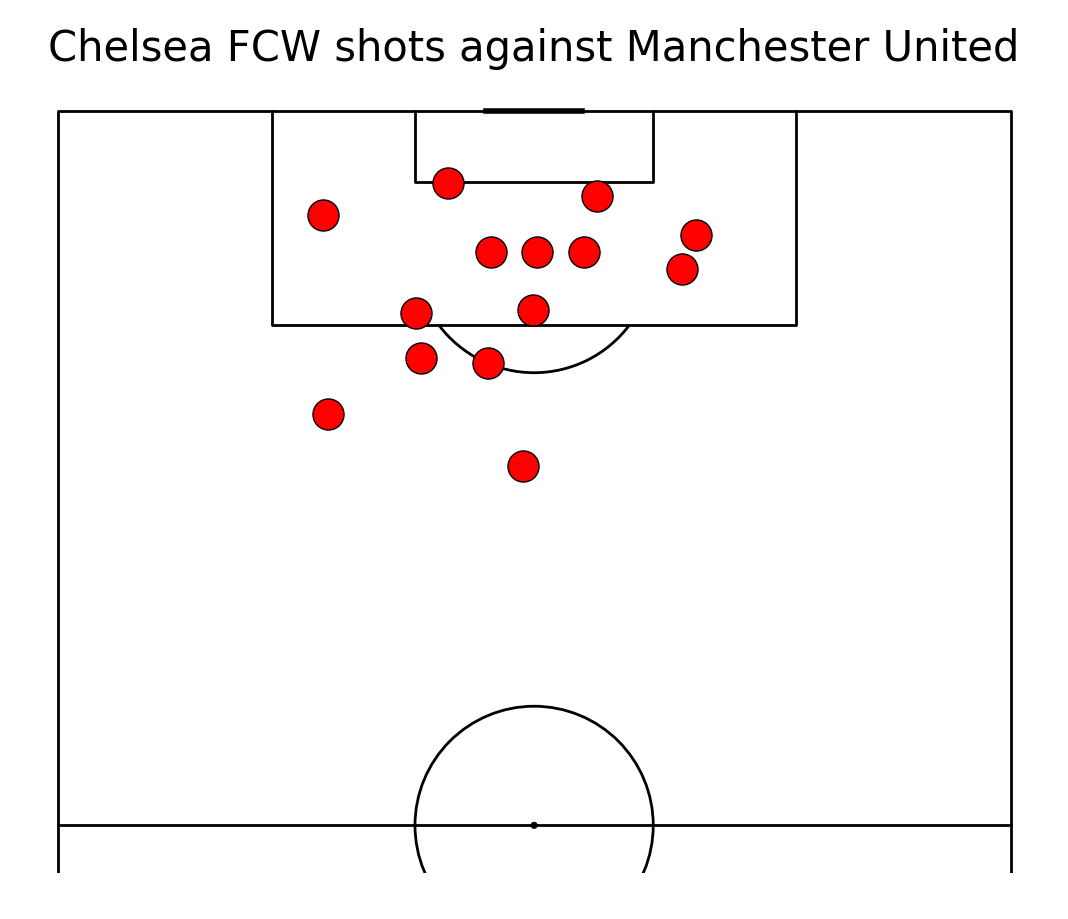

In [43]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")
fig.suptitle("Chelsea FCW shots against Manchester United", fontsize = 30)
plt.show()